<div style="width:image width px; font-size:60%; text-align:right;">
    <img src="img/nicholas-doherty-pONBhDyOFoM-unsplash.jpg" width="width" height="height" style="padding-bottom:0.2em;" />
    <figcaption>Photo by Nicholas Doherty on Unsplash</figcaption>
</div>

# Renewable energy in the European Union

## Table of contents

* [Introduction](#intro)
* [Objectives](#objectives)
* [Libraries and settings](#libraries)
* [Business understanding](#businessunderstanding)
* [Data understanding](#dataunderstanding)
* [Data preparation](#preparation)
* [Modeling and evaluation](#modeling)
* [References](#references)

## Introduction

Renewable energy nowadays is one of the most important fields regarding energy production. As we all know the importance of this type of energy for the environment and future generations is extremely valuable. For that reason  I decided to do a small analysis on the total energy from renewable sources and then analyse the wind and solar productionin the european countries.

The data is provided by European Comission and contains the total energy production of 28 EU contries between 1990 and 2018. The data was last update on 20 March 2020.

I organize the data between the selected group of countries and visualize the results. The visualization process starts with the Wind energy production, in where you can see a trend of some countries leading race. After, comes the Solar energy production and is very interesting to compare the countries that are leading in the Solar production with the Wind energy production. But, the most important visualization is the Nuclear Energy production and the contrast between all the energy production sources.

## Objectives


# Libraries and settings

Loading the necessary libraries.

In [1]:
# Array operations and useful analysis functionalities
import numpy as np
import pandas as pd

# Seaborn library for visualisations in the notebook
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data allocation and preparation

The Excel files are read with pandas.

The Excel files are read with pandas. The  first sheet contains information about 28 EU countries with following sections:
* Summary of energy balances
* Electricity production and infrastructure
* Electricity and gas market indicators
* Heat production (heat sold)
* Cogeneration heat and power
* Transport fuels
* Main energy indicators
* Greenhouse gas emissions
* GDP and population


The other sheets cover a detailed information of every european country, including the UK.

In [2]:
df = pd.read_excel('data/countrydatasheets_march_2020.xlsx', # file name
                   'EU28',                                   # index of sheet in file
                   header=7,                                 # row index of column names
                   usecols='C:AF')                           # 

In [3]:
df.head()

,Unnamed: 2,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Energy Balance [Mtoe],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Production,950.12,942.15,929.9,934.05,949.92,965.29,993.6,985.25,957.77,...,825.65,843.67,812.32,804.94,798.64,780.85,775.92,761.3,760.14,756.87
4,Solid fossil fuels,360.37,335.97,316.47,291.48,269.88,272.67,264.99,260.59,232.36,...,160.9,158.18,161.15,161.85,149.08,143,139.4,127.64,124.97,118.36


In [4]:
# Transforming the data frame
# Cleaning white spaces and renaming columns 

df.rename(columns={'Unnamed: 2':'Year'}, inplace=True)  #renaming Index

df = df.T
df = df.reset_index(level=0)
df.columns = df.iloc[0] # header 
df = df.drop(df.index[0])
df = df.reset_index()
df = df.drop(['index'],axis = 1)
df = df.dropna(axis='columns')

df.head()


,Year,Production,Solid fossil fuels,of which hard coal,of which brown coal,Peat and peat products,Oil shale and oil sands,Oil and petroleum products,of which crude oil,Natural gas,...,Indirect CO2,International aviation,International maritime transport,GHG national total emissions / index 1990,Total GHG per capita - t CO2 eq./cap,GHG Intensity of fuel commbustion - kg CO2 eq./toe,Total GHG - GDP Intensity - ton CO2 eq./M€'10,Total Population [thousands of people],GDP2010 [Mrd EUR at 2010 exchange rates],GDP-market prices [Mrd EUR at current prices]
0,1990,950.12,360.37,220.35,140.02,3.75,4.83,136.02,133.48,163.99,...,4.22,69.14,110.72,1,12.04,2607.73,637.56,475188,8976.3,6094.34
1,1991,942.15,335.97,211.49,124.48,2.75,4.22,134.74,132.1,174.11,...,4,68.04,109.11,0.9833,11.8,2586.62,620.05,476842,9075.24,6380.34
2,1992,929.9,316.47,201.83,114.64,3.31,4.05,137.95,135.38,173.12,...,3.8,73.59,110.81,0.9536,11.42,2564.85,596.29,477925,9152.03,6623.86
3,1993,934.05,291.48,181.23,110.25,2.66,3.21,144.13,141.62,184.09,...,3.71,77.67,111.56,0.9371,11.18,2515.48,586.99,479562,9136.34,6735.58
4,1994,949.92,269.88,166,103.88,3.83,3.12,180.87,178.46,183.33,...,3.61,81.15,111.33,0.9331,11.1,2487.95,568.4,480893,9394.88,7064.21


In [5]:
# Exploring the data

###  Development of the production of primary energy( by fuel type)

This article looks at the production of primary energy within the EU and, as a result of the shortfall between production and consumption, the EU’s increasing dependency on energy imports from non-member countries. Indeed, more than half (55.1 %) of the EU-28’s gross available energy in 2017 came from imported sources.


In [6]:
# New data frame for energy balance

energy_balance= df.iloc[:,0:20]
energy_balance.dtypes

0
Year                          object
Production                    object
Solid fossil fuels            object
of which hard coal            object
of which brown coal           object
Peat and peat products        object
Oil shale and oil sands       object
Oil and petroleum products    object
of which crude oil            object
Natural gas                   object
Nuclear                       object
Renewables and biofuels       object
Hydro                         object
Wind                          object
Solar photovoltaic            object
Solar thermal                 object
Solid biofuels                object
Biogases                      object
Liquid biofuels               object
Wastes, Non-Renewable         object
dtype: object

In [7]:
# Change type of columns 
energy_balance=energy_balance.astype('float64')
energy_balance=energy_balance.astype({'Year': 'int64'})
energy_balance.dtypes

0
Year                            int64
Production                    float64
Solid fossil fuels            float64
of which hard coal            float64
of which brown coal           float64
Peat and peat products        float64
Oil shale and oil sands       float64
Oil and petroleum products    float64
of which crude oil            float64
Natural gas                   float64
Nuclear                       float64
Renewables and biofuels       float64
Hydro                         float64
Wind                          float64
Solar photovoltaic            float64
Solar thermal                 float64
Solid biofuels                float64
Biogases                      float64
Liquid biofuels               float64
Wastes, Non-Renewable         float64
dtype: object

In [8]:
energy_balance['Oil']= energy_balance['Oil shale and oil sands']+ energy_balance['Oil and petroleum products']
energy_balance=energy_balance.drop(['of which hard coal',
                                          'of which brown coal',
                                          'Oil shale and oil sands',
                                          'Oil and petroleum products',
                                          'of which crude oil',
                                          'Hydro','Wind', 'Solar photovoltaic',
                                         'Solar thermal', 'Solid biofuels', 'Biogases','Liquid biofuels'],axis=1)

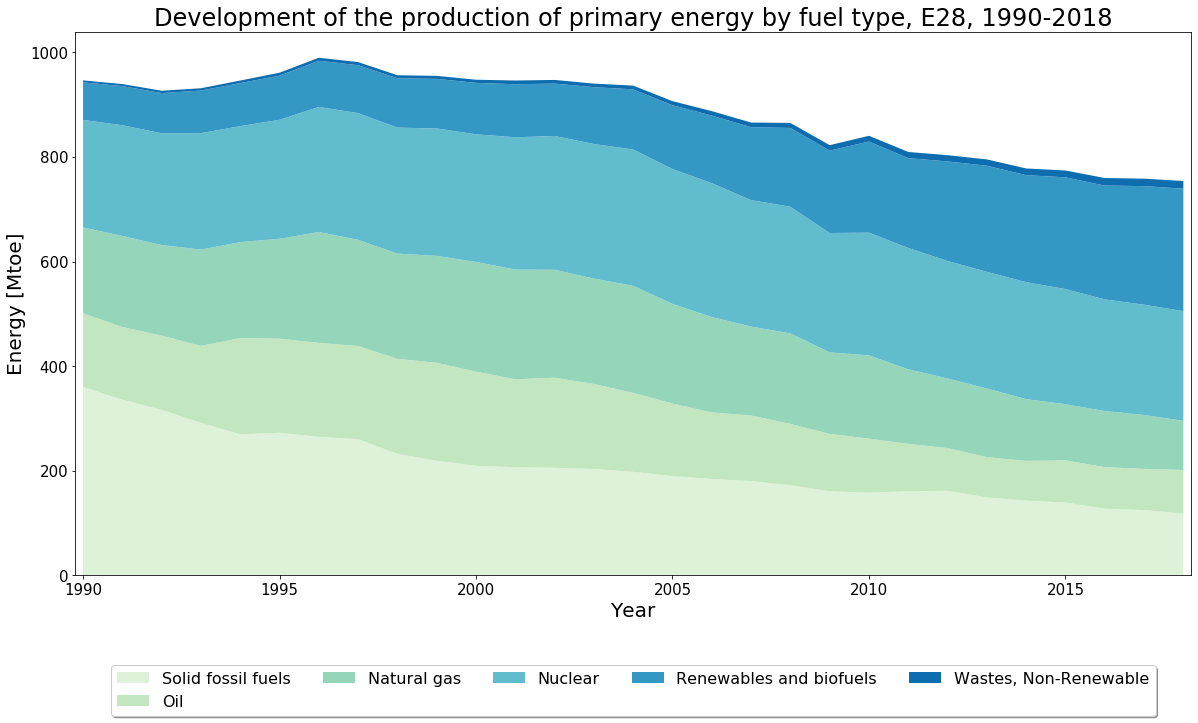

In [9]:
# Save a palette to a variable:
palette = sns.color_palette("GnBu")


x = energy_balance['Year']
#y1 = energy_production['Production']
y2 = energy_balance['Solid fossil fuels']
y3 = energy_balance['Oil']
y4 = energy_balance['Natural gas']
y5 = energy_balance['Nuclear']
y6 = energy_balance['Renewables and biofuels']
y7 = energy_balance['Wastes, Non-Renewable']


y = np.vstack([y2, y3,y4,y5,y6,y7])

labels = [ 'Solid fossil fuels', 'Oil','Natural gas', 'Nuclear','Renewables and biofuels', 'Wastes, Non-Renewable' ]

fig, ax = plt.subplots(figsize=(20,10))

plt.ylabel('Energy [Mtoe]',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Development of the production of primary energy by fuel type, E28, 1990-2018',fontsize=24)
plt.xlim(1989.8, 2018.2)

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

ax.stackplot(x, y, labels=labels, colors=palette)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, fontsize=16)
plt.show()




Text

## Development of the energy from renewable sources 


This article looks at development of the energy from renewable sources within the EU.
Renewable energy sources include wind power, solar power (thermal, photovoltaic and concentrated), hydro power, tidal power, geothermal energy, ambient heat captured by heat pumps, biofuels and the renewable part of waste.



In [10]:
# New data frame for renewable energy
renewable_energy= df.iloc[:,12:19]
renewable_energy.dtypes

0
Hydro                 object
Wind                  object
Solar photovoltaic    object
Solar thermal         object
Solid biofuels        object
Biogases              object
Liquid biofuels       object
dtype: object

In [11]:
# Einige Tabellen als Int speichern --> Dictionary
renewable_energy=renewable_energy.astype('float64')
renewable_energy.dtypes

0
Hydro                 float64
Wind                  float64
Solar photovoltaic    float64
Solar thermal         float64
Solid biofuels        float64
Biogases              float64
Liquid biofuels       float64
dtype: object

In [12]:
renewable_energy['Solar'] = renewable_energy['Solar photovoltaic']+renewable_energy['Solar thermal']
renewable_energy=renewable_energy.drop(['Solar photovoltaic','Solar thermal'], axis=1)
renewable_energy.head(5)

,Hydro,Wind,Solid biofuels,Biogases,Liquid biofuels,Solar
0,24.94,0.07,40.62,0.67,0.01,0.16
1,25.93,0.09,42.37,0.72,0.01,0.18
2,27.05,0.13,42.89,0.84,0.02,0.20
3,27.66,0.20,46.30,0.94,0.05,0.21
4,28.61,0.30,46.05,1.02,0.13,0.23


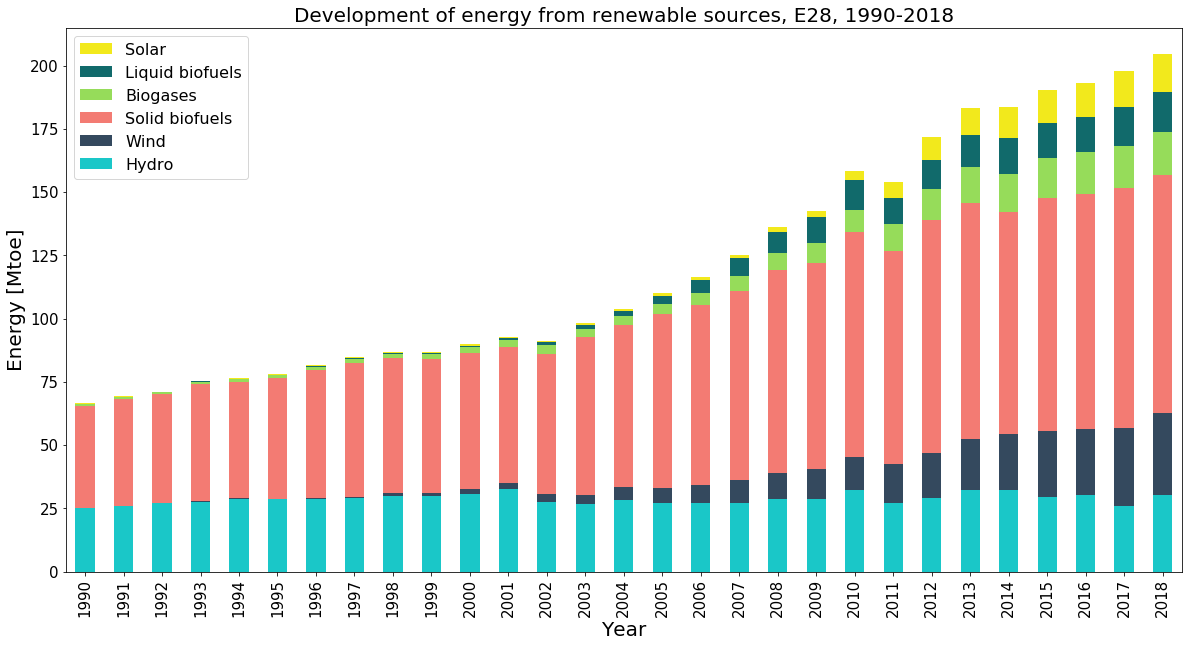

In [13]:
from matplotlib.colors import ListedColormap

colors=["#1ac7c8", "#34495e", "#f37b73", "#96dc5a", "#116a6b", "#f2e91c"]

sns.set_palette(colors)
renewable_energy.index = df['Year']
ax= renewable_energy.plot(kind='bar', stacked=True,
                          colormap=ListedColormap(sns.color_palette(colors)),
                          fontsize=15,
                          figsize=(20,10))

ax.set_title('Development of energy from renewable sources, E28, 1990-2018',fontsize= 20) # title of plot
ax.set_xlabel('Year',fontsize = 20) #xlabel
ax.set_ylabel('Energy [Mtoe]', fontsize = 20)#ylabel


# reverse the order
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],loc='upper left',fontsize=16)

In [14]:
#Text 

## Share of renewable energies in net public electricity generation

The article shows the net electricity generation from renewable sources for the public power supply. 

In [15]:
# New DataFrame fro electricity production
electricity_production=df.iloc[:,223:242]
electricity_production.dtypes
electricity_production=electricity_production.astype('float64')
electricity_production.dtypes

0
Gross Electricity Generation, by Fuel  [TWh]                      float64
Solid fossil fuels, peat and products, oil shale and oil sands    float64
of which hard coal                                                float64
of which brown coal                                               float64
Oil and petroleum products                                        float64
Natural gas and manufactured gas                                  float64
of which natural gas                                              float64
Nuclear                                                           float64
Renewables and biofuels                                           float64
Hydro                                                             float64
Wind                                                              float64
Solid biofuels and renewable wastes                               float64
Biogases                                                          float64
Liquid biofuels                     

In [16]:
electricity_production.rename(columns={electricity_production.columns[0]:'Electricity Generation',
                                       electricity_production.columns[1]:'Fossil fuels and Oil',
                                       electricity_production.columns[11]:'Solid Fuels and renewable wastes'},inplace=True)


electricity_production=electricity_production.drop(['Fossil fuels and Oil','of which hard coal','of which brown coal',
                            'Oil and petroleum products','Natural gas and manufactured gas',
                            'of which natural gas','Nuclear','Wastes non-RES','Other'],axis=1)

electricity_production.head()

,Electricity Generation,Renewables and biofuels,Hydro,Wind,Solid Fuels and renewable wastes,Biogases,Liquid biofuels,Solar,Geothermal,"Tide, Wave and Ocean"
0,2594.78,327.57,308.71,0.78,13.42,0.91,0.0,0.02,3.23,0.50
1,2639.60,341.68,321.72,1.10,13.94,1.19,0.0,0.02,3.19,0.52
2,2623.42,357.91,336.34,1.56,14.67,1.32,0.0,0.03,3.46,0.52
3,2625.67,365.10,340.91,2.36,15.95,1.69,0.0,0.03,3.67,0.49
4,2666.28,377.32,350.81,3.49,17.15,1.87,0.0,0.04,3.45,0.50


In [17]:
# Create new column that ...
electricity_production['Renewables Rest']= electricity_production['Renewables and biofuels'] -(electricity_production['Wind']+electricity_production['Solar'])

In [18]:
# New DataFrame for share of renewables
share_renwables=electricity_production.filter(['Renewables and biofuels','Wind','Solar','Renewables Rest'])
share_renwables.head(5)

,Renewables and biofuels,Wind,Solar,Renewables Rest
0,327.57,0.78,0.02,326.77
1,341.68,1.10,0.02,340.56
2,357.91,1.56,0.03,356.32
3,365.10,2.36,0.03,362.71
4,377.32,3.49,0.04,373.79


In [19]:
# Create new colums with the ....
electricity_production['Share Renewables']=(electricity_production['Renewables and biofuels']/electricity_production['Electricity Generation'])*100
electricity_production['Share Wind']=(electricity_production['Wind']/electricity_production['Electricity Generation'])*100
electricity_production['Share Solar']=(electricity_production['Solar']/electricity_production['Electricity Generation'])*100
electricity_production['Share Rest']=(electricity_production['Renewables Rest']/electricity_production['Electricity Generation'])*100

In [20]:
share_renewables=electricity_production.filter(['Share Renewables','Share Wind','Share Solar','Share Rest'])
#share_renewables=electricity_production.filter(['Share Wind','Share Solar','Share Rest'])
share_renewables.tail(15)

,Share Renewables,Share Wind,Share Solar,Share Rest
14,14.833565,1.803578,0.020930,13.009057
15,14.983625,2.141121,0.044330,12.798174
16,15.504675,2.464323,0.074280,12.966072
17,16.296382,3.111991,0.112136,13.072255
18,17.607107,3.557242,0.220185,13.829680
19,19.522196,4.157413,0.438603,14.926180
20,21.151638,4.465045,0.691780,15.994813
21,21.453143,5.485515,1.438015,14.529612
22,24.271247,6.285740,2.168824,15.816682
23,27.233858,7.264581,2.629811,17.339466


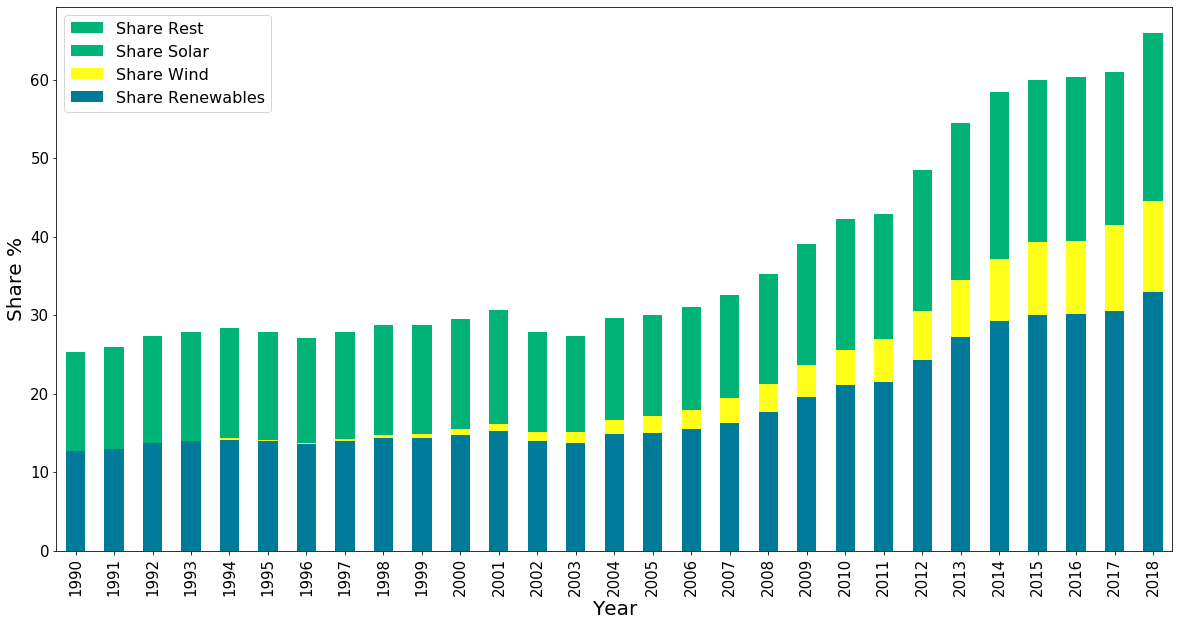

In [21]:
from matplotlib.colors import ListedColormap

color=['#007a99','#ffff1a','#00b377']

sns.set_palette(colors)
share_renewables.index = df['Year']
ax= share_renewables.plot(kind='bar', stacked=True,
                          colormap=ListedColormap(sns.color_palette(color)),
                          fontsize=15,
                          figsize=(20,10))

ax.set_title('',fontsize= 20) # title of plot
ax.set_xlabel('Year',fontsize = 20) #xlabel
ax.set_ylabel('Share %', fontsize = 20)#ylabel


# reverse the order
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],loc='upper left',fontsize=16)

#The share of renewable energy in total energy production increased from 17.6 % percent in 2008 ca. 33%  in 2018. According to the EU Renewable Energy Directive, the Dutch share for 2020 is set at 14%.



## The share of energy from renewable sources in the EU Member States (2018)

In [31]:
numbersheets = 28
df_results = pd.DataFrame({'Country':range(numbersheets), 
                           'Share Renewables':range(numbersheets),
                           'Share Wind':range(numbersheets),
                           'Share Solar':range(numbersheets),
                           'Share Rest':range(numbersheets)})

startsheet = 2
year = 2018
yearindex = year-1990+3
for i in range(numbersheets):
    df1 = pd.read_excel('data/countrydatasheets_march_2020.xlsx', sheet_name=i+startsheet)
    df_results.iloc[i,0]=df.iloc[4,3]
    df_results.iloc[i,1]= (df1.iloc[266,yearindex]/df.iloc[257,yearindex]*100) # Renewables Total
    df_results.iloc[i,2]= (df1.iloc[268,yearindex]/df.iloc[257,yearindex]*100) #Wind
    df_results.iloc[i,3]= (df1.iloc[272,yearindex]/df.iloc[257,yearindex]*100) #Solar
    df_results.iloc[i,4]= (df_results.iloc[i,1]-(df_results.iloc[i,2]+df_results.iloc[i,3])) #Rest


df_results.head(5)


,Country,Share Renewables,Share Wind,Share Solar,Share Rest
0,BE,1446.763168,505.857124,171.344324,769.561721
1,BE,24.353304,9.998660,5.227181,9.127463
2,BE,12.840102,1.769200,1.796006,9.274896
3,BE,14.046374,0.817585,3.163115,10.065675
4,BE,27.838091,18.630210,1.273288,7.934593


In [23]:
df_results=df_results.filter(['Country','Share Wind','Share Solar','Share Rest'])
df_results

,Country,Share Wind,Share Solar,Share Rest
0,EU28,11.534101,3.906840,17.546857
1,BE,9.998660,5.227181,9.127463
2,BG,2.819308,2.862025,14.780009
3,CZ,0.693891,2.684564,8.542828
4,DK,45.753785,3.127057,19.486504
5,DE,17.137112,7.135398,11.722440
6,EE,5.177994,0.242718,10.679612
7,IE,27.754578,0.064247,5.685834
8,EL,11.828765,7.116035,11.396921
9,ES,18.552267,4.643534,15.567138


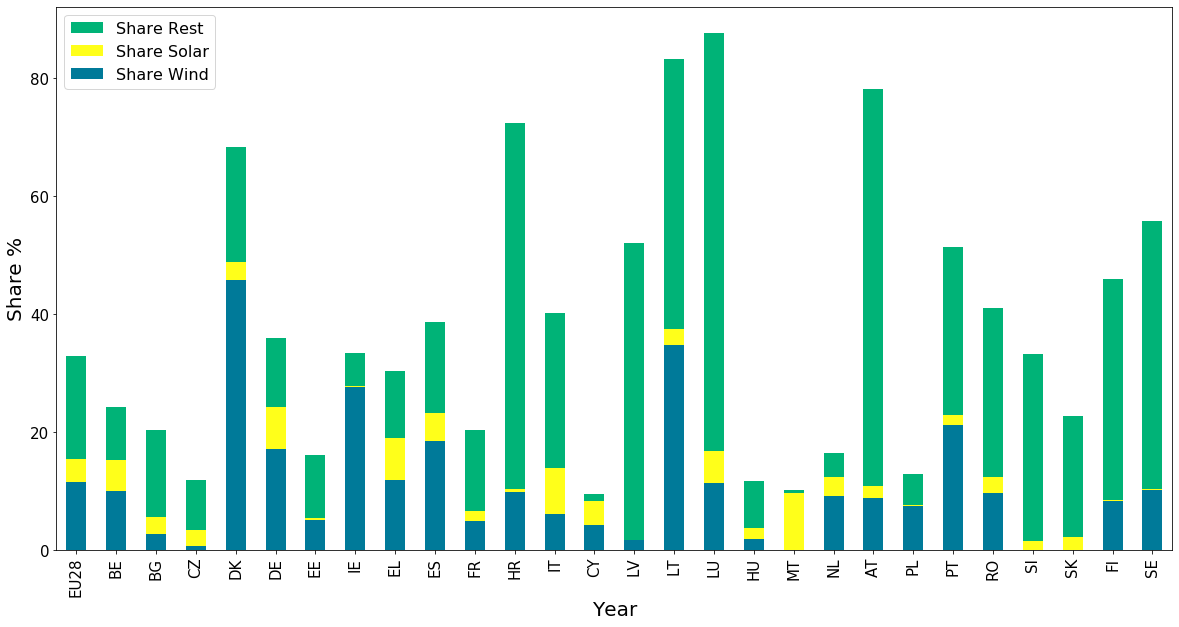

In [24]:
from matplotlib.colors import ListedColormap

color=['#007a99','#ffff1a','#00b377']

sns.set_palette(colors)
df_results.index = df_results['Country']
ax= df_results.plot(kind='bar', stacked=True,
                          colormap=ListedColormap(sns.color_palette(color)),
                          fontsize=15,
                          figsize=(20,10))

ax.set_title('',fontsize= 20) # title of plot
ax.set_xlabel('Year',fontsize = 20) #xlabel
ax.set_ylabel('Share %', fontsize = 20)#ylabel


# reverse the order
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],loc='upper left',fontsize=16)

In [25]:
#text

## Determine the solar electricity capacity of top 5 EU ontries

In [32]:
numbersheets = 4
df_results2 = pd.DataFrame({'Country':range(numbersheets), 
                           'Installed Capacity':range(numbersheets),
                           'Wind':range(numbersheets),
                           'Solar PV':range(numbersheets),
                           'Share T':range(numbersheets)})

startsheet = 2
year = 2018
yearindex = year-1990+3
for i in range(numbersheets):
    df2 = pd.read_excel('data/countrydatasheets_march_2020.xlsx', sheet_name=i+startsheet)
    df_results2.iloc[i,0]=data.iloc[4,3]
    df_results2.iloc[i,1]= df2.iloc[283,yearindex] # Renewables Total
    df_results2.iloc[i,2]= df2.iloc[287,yearindex]  #Wind
    df_results2.iloc[i,3]= df2.iloc[288,yearindex] #Solar
    df_results2.iloc[i,4]= df2.iloc[289,yearindex] #Solar


df_results2.head(5)


,Country,Installed Capacity,Wind,Solar PV,Share T
0,CZ,1037714.88,179062.84,114678.69,2306.15
1,CZ,22790.10,3260.70,3986.50,
2,CZ,11339.00,698.92,1032.68,
3,CZ,22276.88,316.20,2075.07,
